In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv', index_col=0)
display(customer_df)

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize


In [3]:
customer_df.shape

(9134, 23)

In [4]:
customer_df.dtypes

State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [5]:
customer_df.isna().sum()

State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [6]:
customer_df.corr()['Customer Lifetime Value'].sort_values(ascending=False)

Customer Lifetime Value          1.000000
Monthly Premium Auto             0.396262
Total Claim Amount               0.226451
Income                           0.024366
Number of Policies               0.021955
Months Since Last Claim          0.011517
Months Since Policy Inception    0.009418
Number of Open Complaints       -0.036343
Name: Customer Lifetime Value, dtype: float64

In [7]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Customer Lifetime Value        9134 non-null   float64
 2   Response                       9134 non-null   object 
 3   Coverage                       9134 non-null   object 
 4   Education                      9134 non-null   object 
 5   Effective To Date              9134 non-null   object 
 6   EmploymentStatus               9134 non-null   object 
 7   Gender                         9134 non-null   object 
 8   Income                         9134 non-null   int64  
 9   Location Code                  9134 non-null   object 
 10  Marital Status                 9134 non-null   object 
 11  Monthly Premium Auto           9134 non-null   int64  
 12  Months Since Last Claim        9134 non-null

In [8]:
#Cleaning all the column titles to switch with PE8 Format

customer_df.columns = customer_df.columns.str.lower()

customer_df.columns = customer_df.columns.str.replace(' ', '_', regex=False)

customer_df = customer_df.rename(columns={
   'employmentstatus': 'employment_status'
})

customer_df

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize


In [9]:
#Fix the data types. The column to change is effective_to_date (to get only years and month) to be able to exploit this information correctly. 

#First I need to convert the column at the date format
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df

#Then, I split date in year and month
customer_df['Month'] = customer_df['effective_to_date'].dt.month
customer_df['Month']

customer_df1 = customer_df.drop('effective_to_date', axis=1)

customer_df1.head()

,state,customer_lifetime_value,response,coverage,education,employment_status,gender,income,location_code,marital_status,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,Month
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
AI49188,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
WW63253,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
HB64268,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2


In [10]:
customer_df1['Month'].value_counts()

1    4898
2    4236
Name: Month, dtype: int64

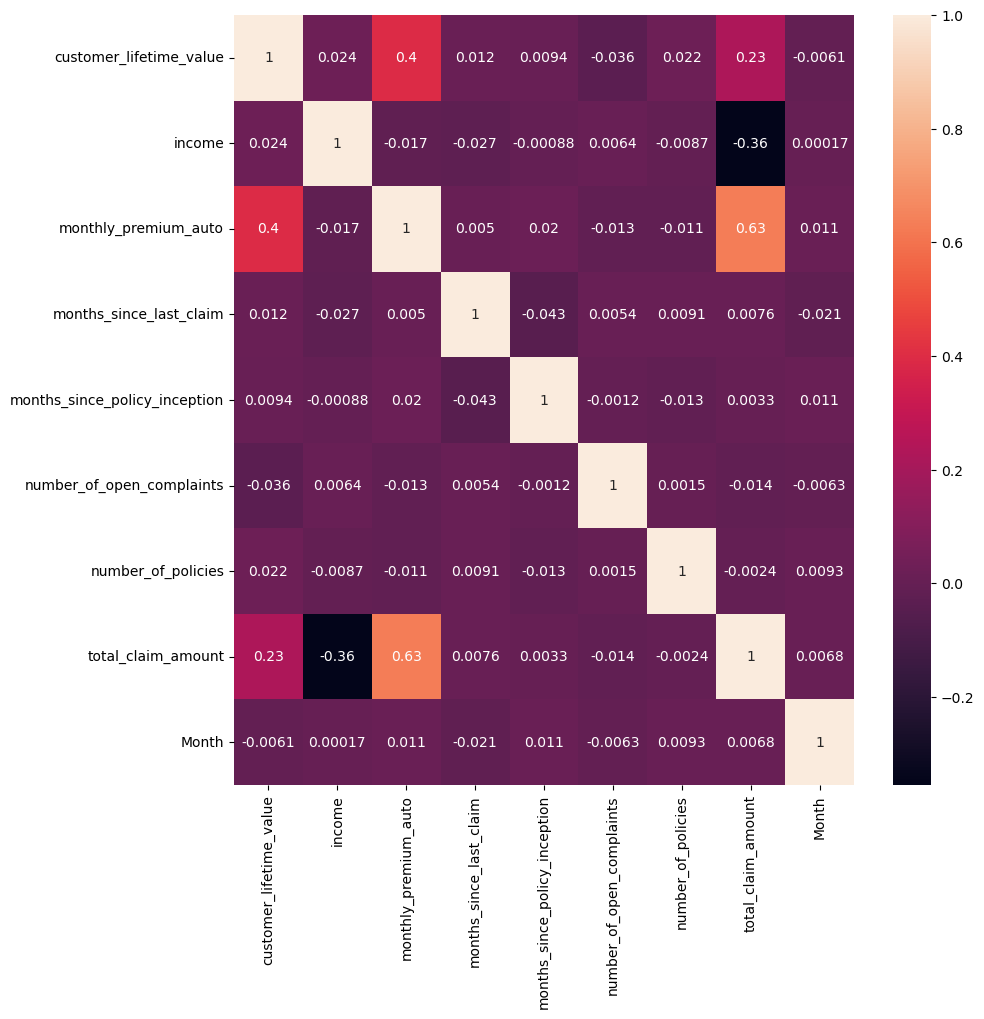

In [11]:
corr_matrix=customer_df1.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [12]:
#The correlation Matrix shows that the monthly premium auto and the 
#total claim amount are the 2 variables that are the moste correclated to our customer lifetime value.
#We observe as well a negative correlation with the number of complaints which is logic because they 
#are less satisfied customers. 

<Axes: >

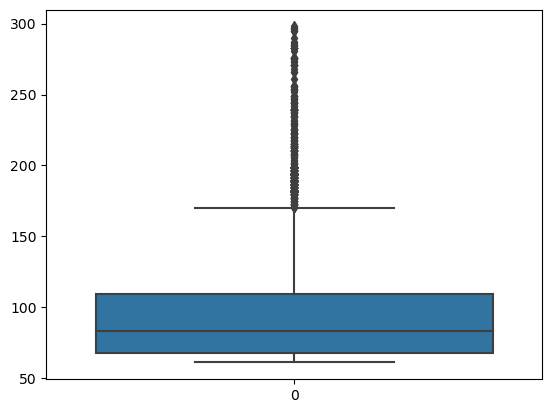

In [13]:
#Let's plot each variable to have a better view of the data. 

sns.boxplot(customer_df1['monthly_premium_auto'])

<Axes: >

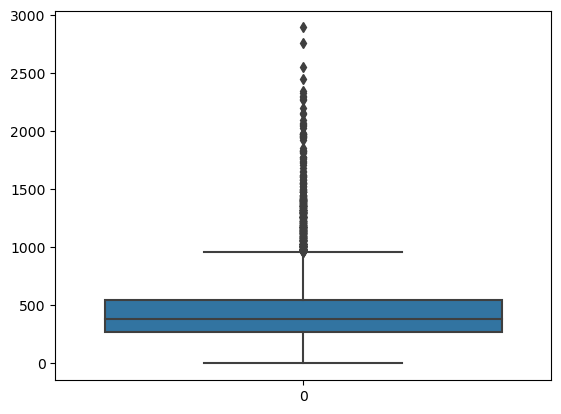

In [14]:
sns.boxplot(customer_df1['total_claim_amount'])

<Axes: >

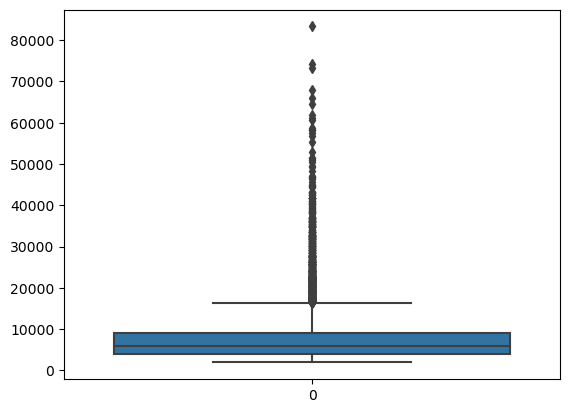

In [15]:
sns.boxplot(customer_df1['customer_lifetime_value'])

In [16]:
#We can see that most of the customer have a life time value below 10000 but we still have a lorge amount of customer above 15000

<Axes: xlabel='customer_lifetime_value', ylabel='Density'>

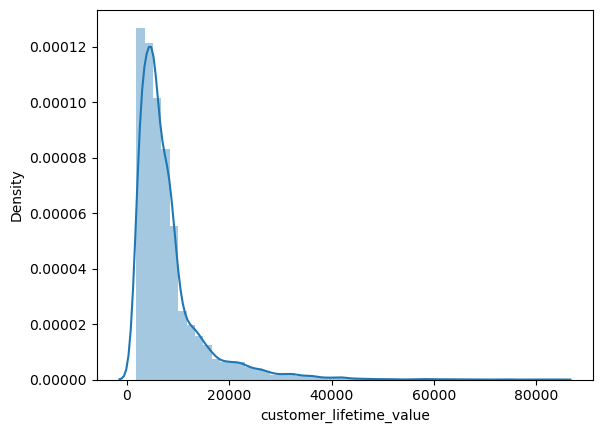

In [17]:
sns.distplot(customer_df1['customer_lifetime_value'])

In [18]:
#This graph confirm the previous analysis with a long tail on the right.
#Knowing that we have a large sample of client with a lifetime value above 15000 it could be interesting to focus on these ones to analysis only the sample of client with the best retention. 

In [37]:
#Here we can see that we have enough rows to make an analysis

customer_df1[(customer_df1['customer_lifetime_value'] > 15000) & (customer_df1['customer_lifetime_value'] < 30000)].shape

(782, 23)

<Axes: xlabel='customer_lifetime_value', ylabel='Density'>

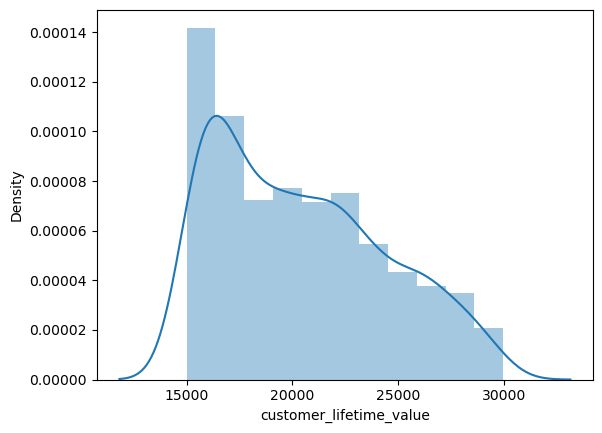

In [38]:
#Let's check the shape of our dataset by focusing on our "best" clients
sns.distplot(customer_df1[(customer_df1['customer_lifetime_value'] > 15000)& (customer_df1['customer_lifetime_value'] < 30000)]['customer_lifetime_value'])

<Axes: >

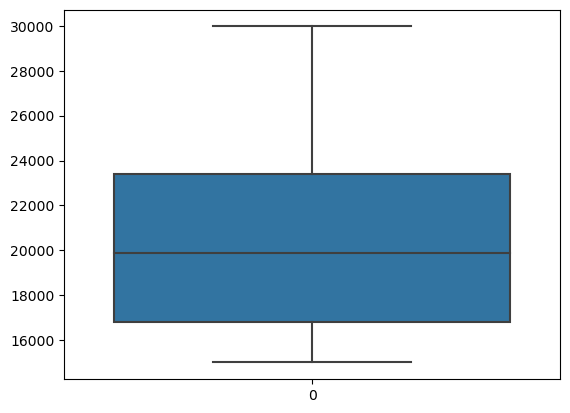

In [22]:
sns.boxplot(customer_df1[(customer_df1['customer_lifetime_value'] > 15000) & (customer_df1['customer_lifetime_value'] < 30000)]['customer_lifetime_value'])

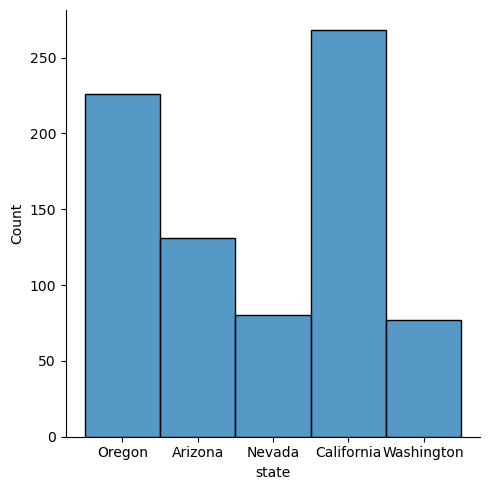

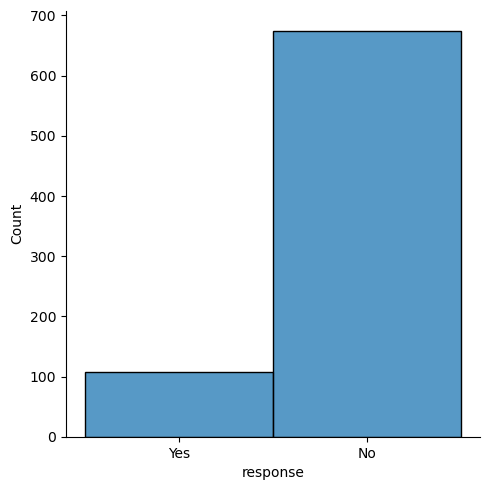

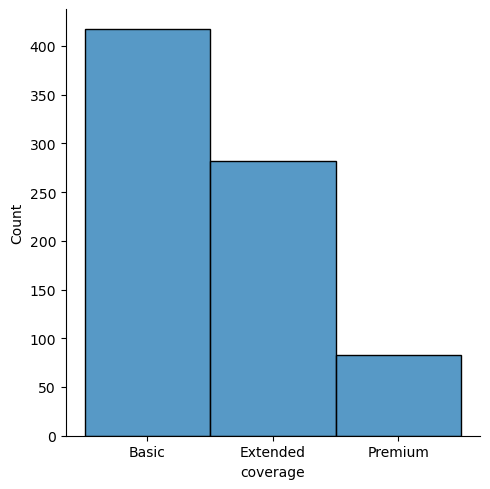

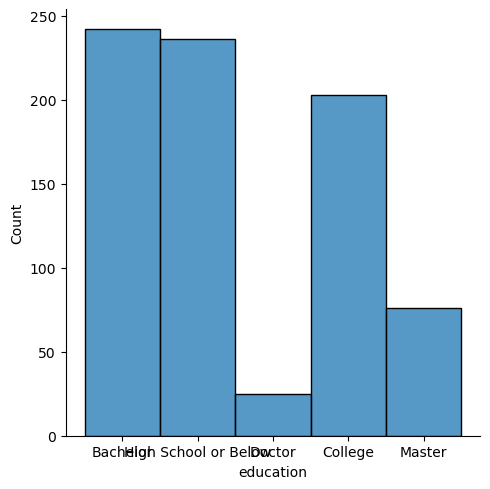

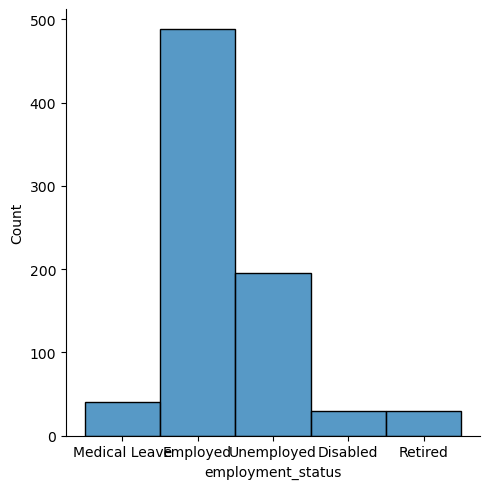

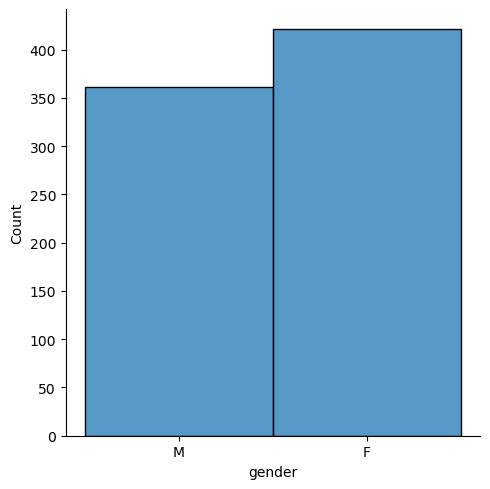

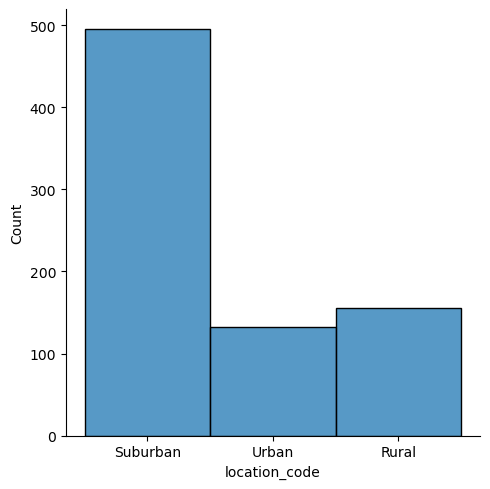

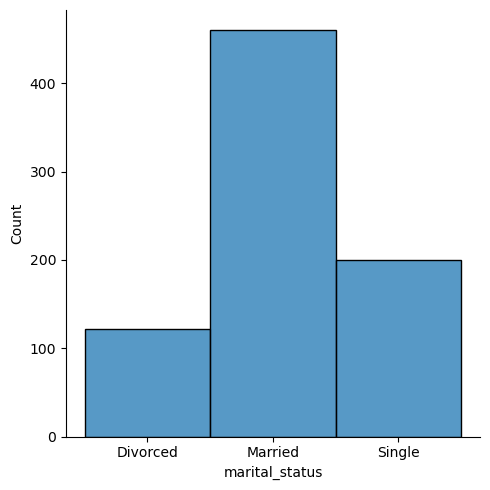

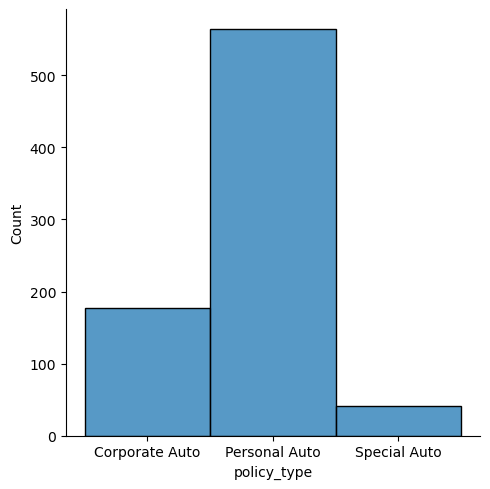

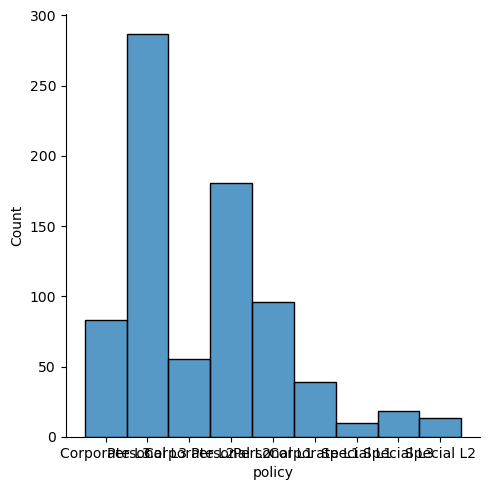

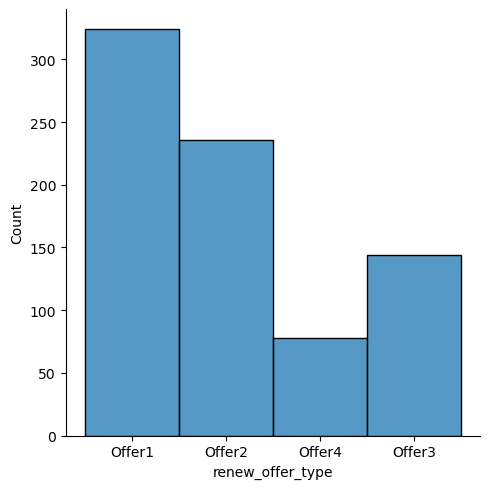

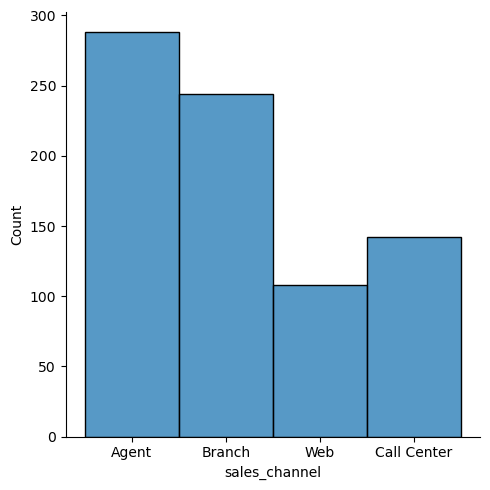

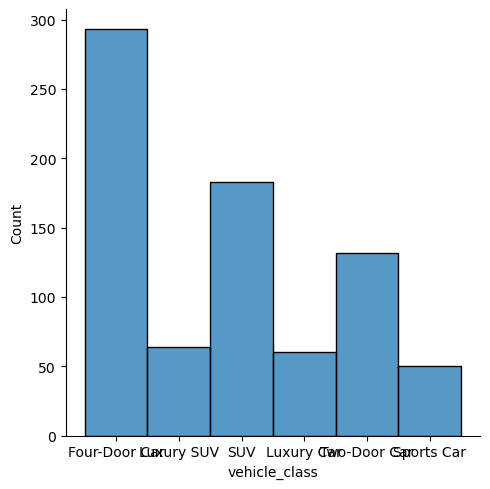

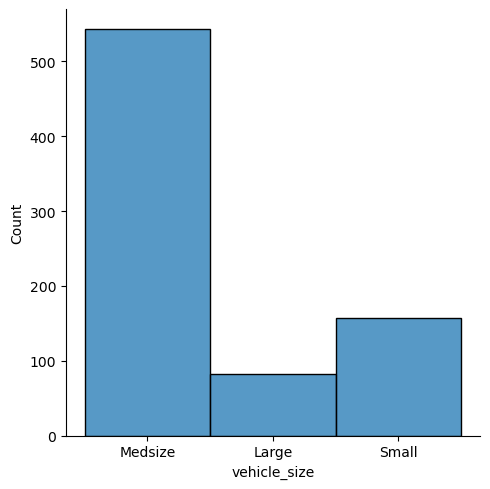

In [32]:
#We vizualize the categorial data where customer lifetime value is between 15000 and 30000 to identifie outliers.  

customer_df2 = customer_df1[(customer_df1['customer_lifetime_value'] > 15000) & (customer_df1['customer_lifetime_value'] < 30000)]

for col in customer_df2.select_dtypes(include='object'):
    sns.displot(customer_df2[col])
    plt.show()

In [25]:
#The variables with outliers are: "education", "employement_status", 'policy_type', "policy"
#We can see as well that there are no missing data in the dataset

In [33]:
#Open the categoricals variable we created before.
categoricals = customer_df2.select_dtypes(np.object)

In [34]:
categoricals.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
Customer,,,,,,,,,,,,,,
DY87989,Oregon,Yes,Basic,Bachelor,Medical Leave,M,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
YH23384,Arizona,Yes,Basic,Bachelor,Medical Leave,M,Suburban,Divorced,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
UL64533,Nevada,No,Extended,High School or Below,Employed,M,Urban,Married,Corporate Auto,Corporate L2,Offer2,Agent,Luxury SUV,Medsize
NN71951,California,No,Basic,High School or Below,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer1,Agent,SUV,Medsize
PY70169,Oregon,No,Basic,High School or Below,Employed,M,Rural,Divorced,Personal Auto,Personal L3,Offer4,Agent,SUV,Medsize


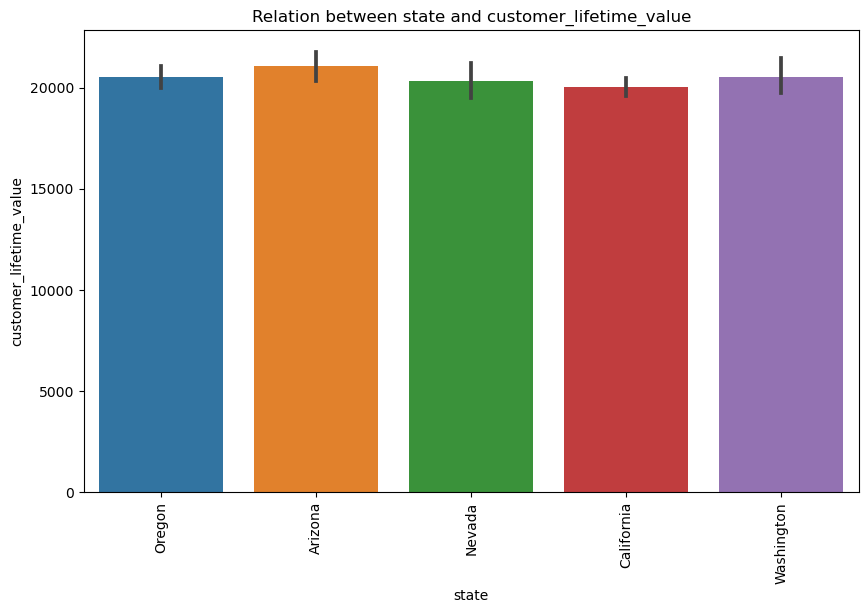

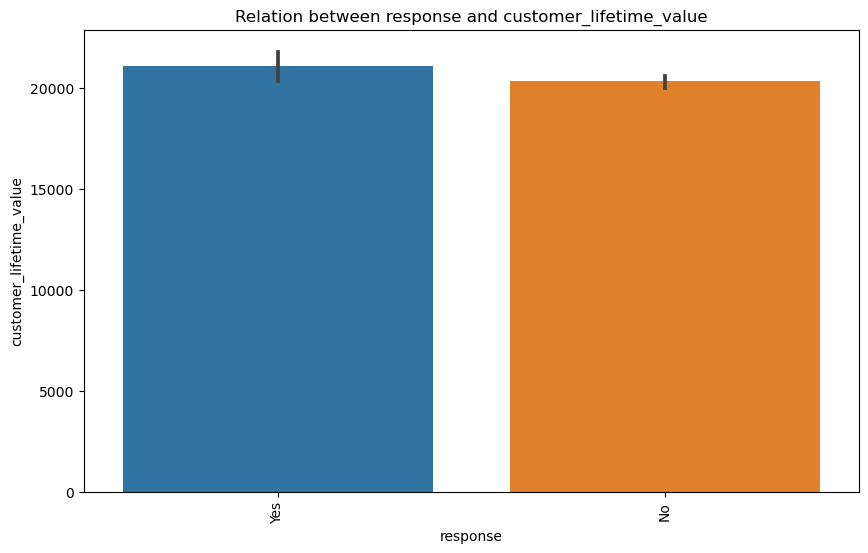

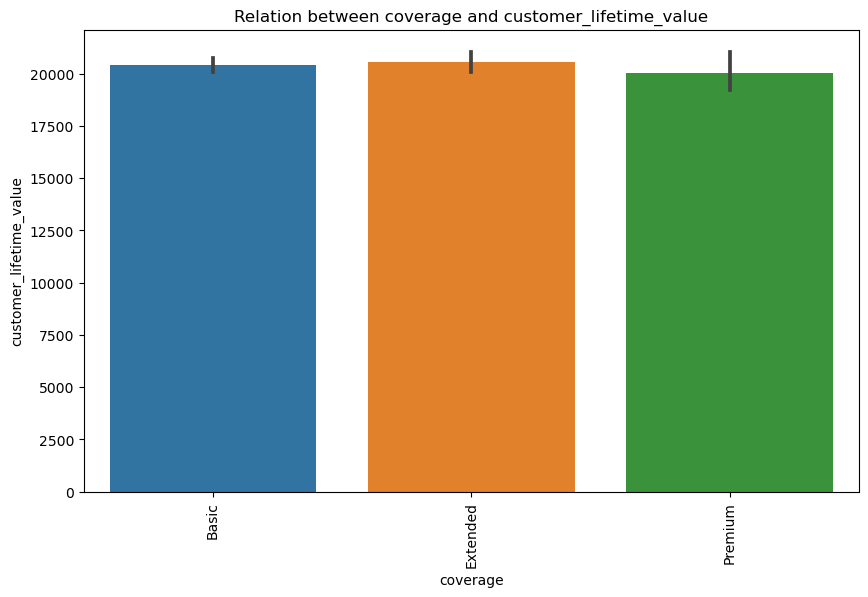

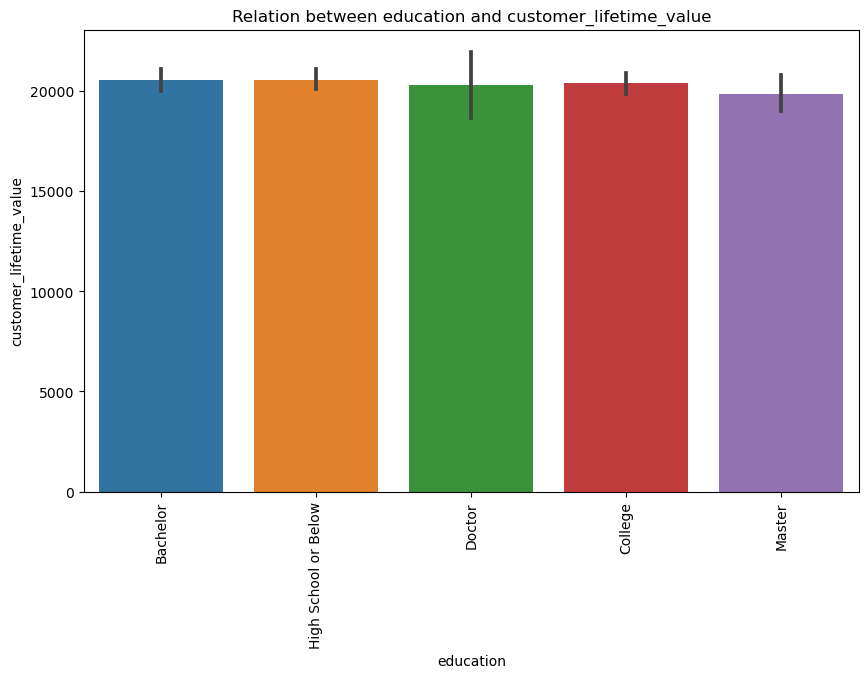

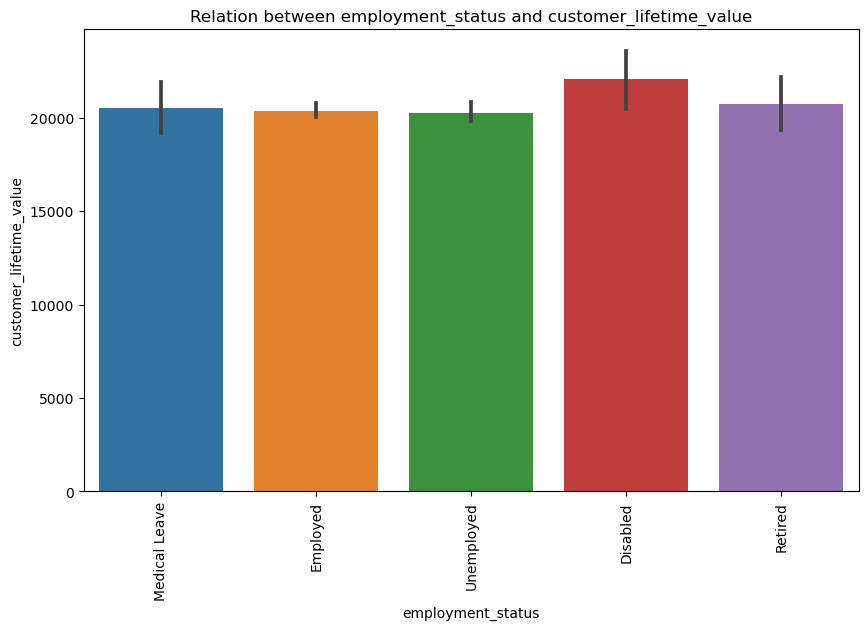

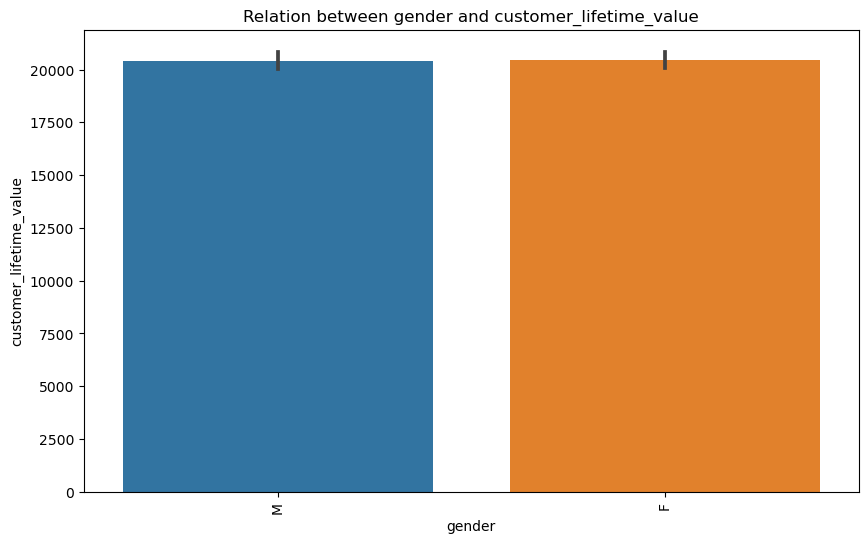

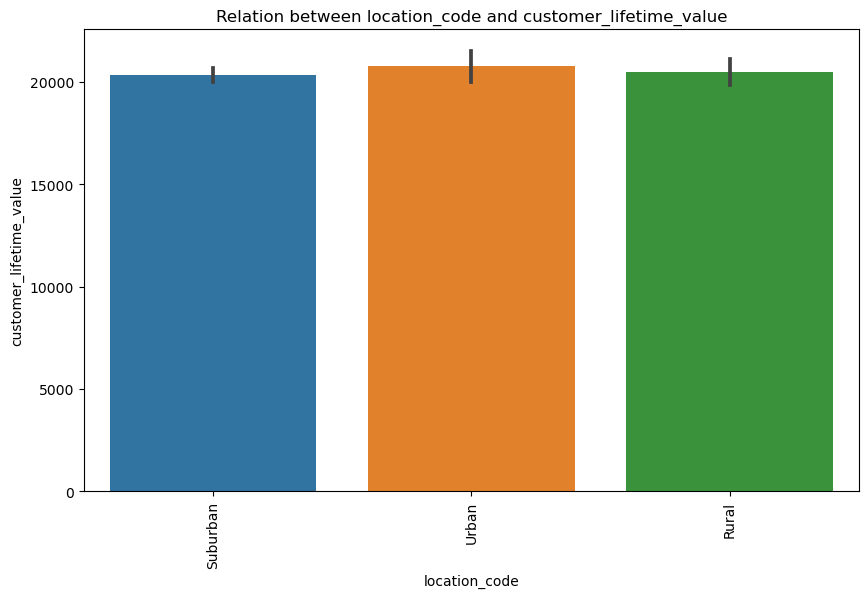

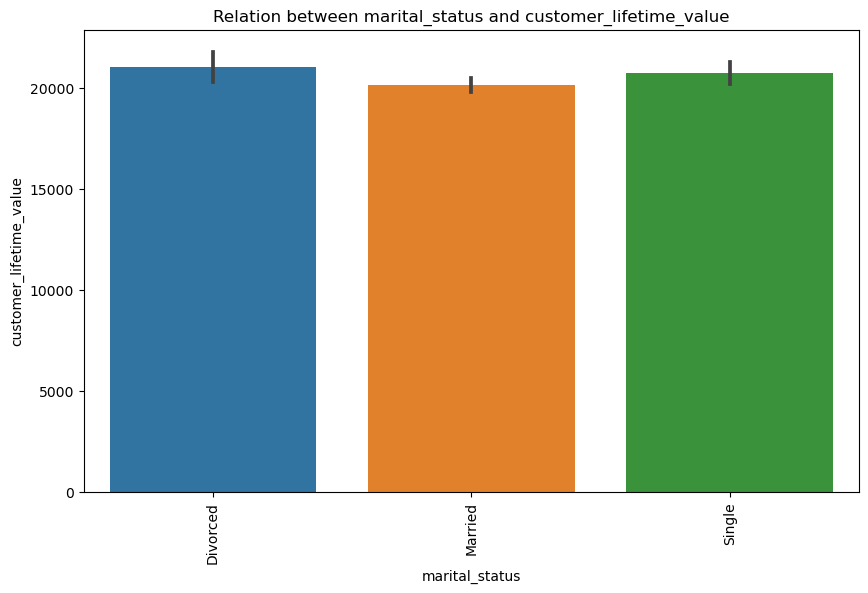

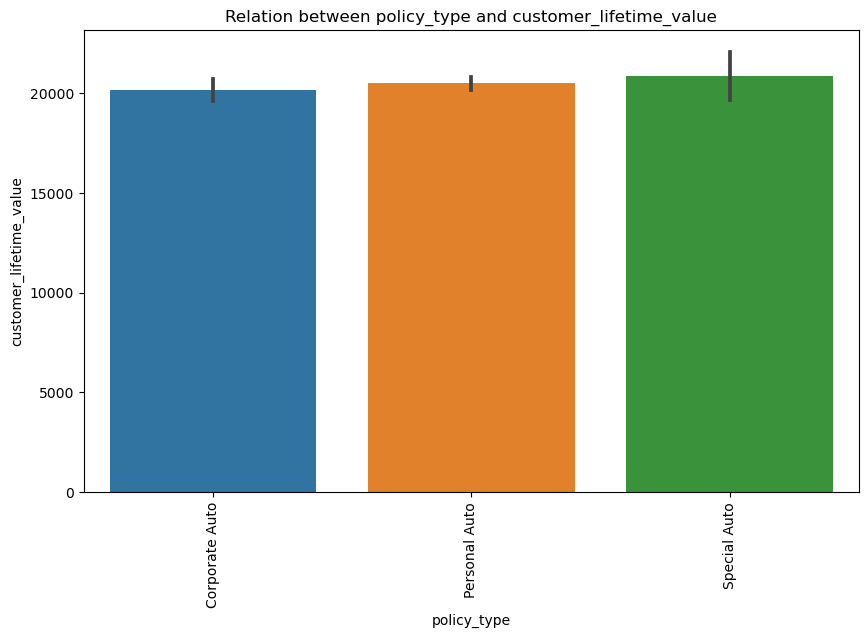

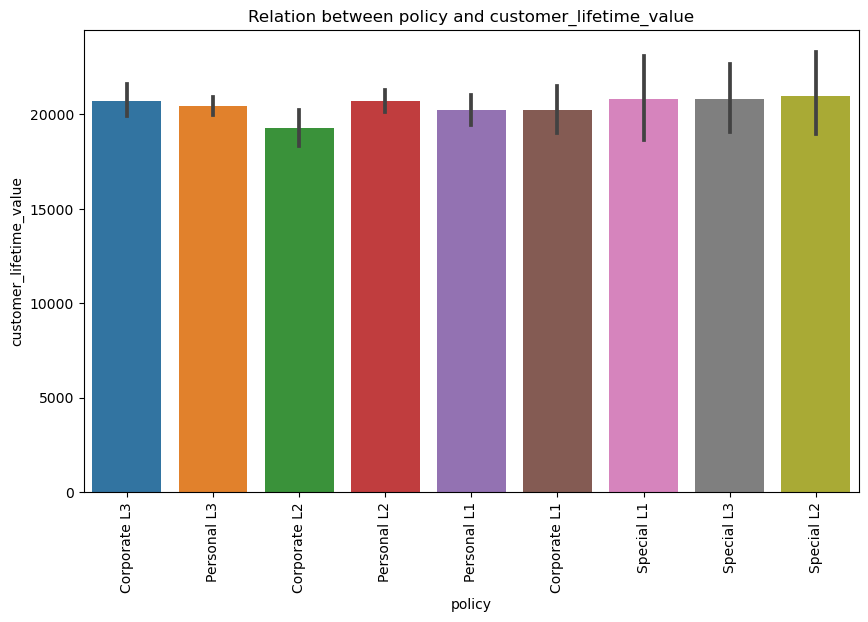

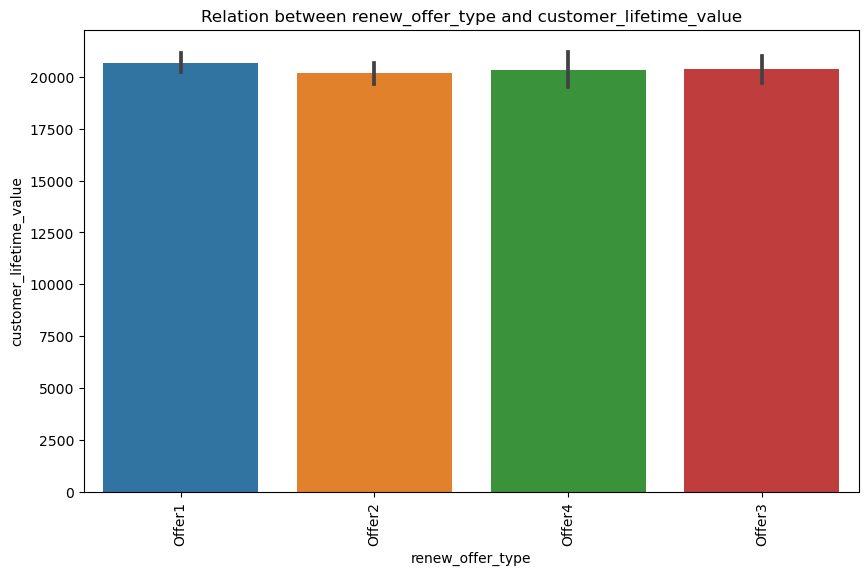

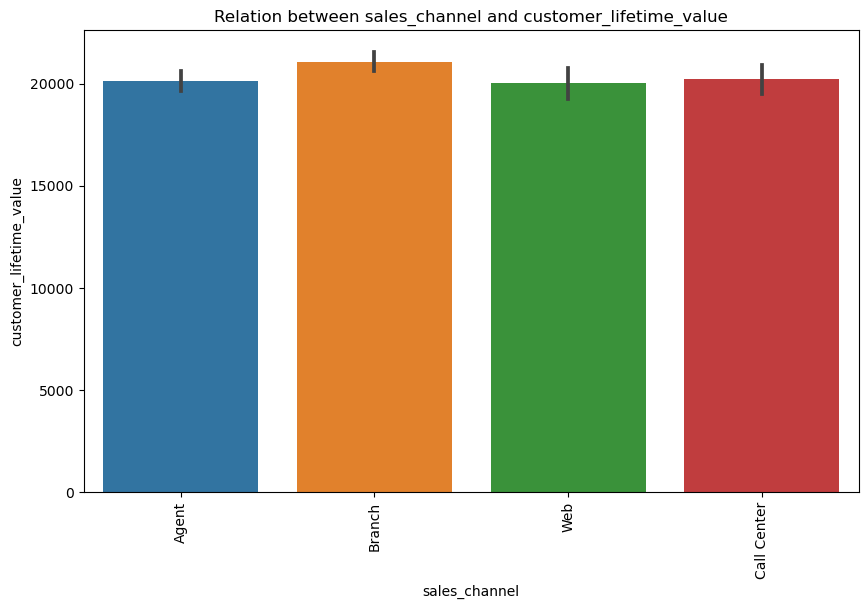

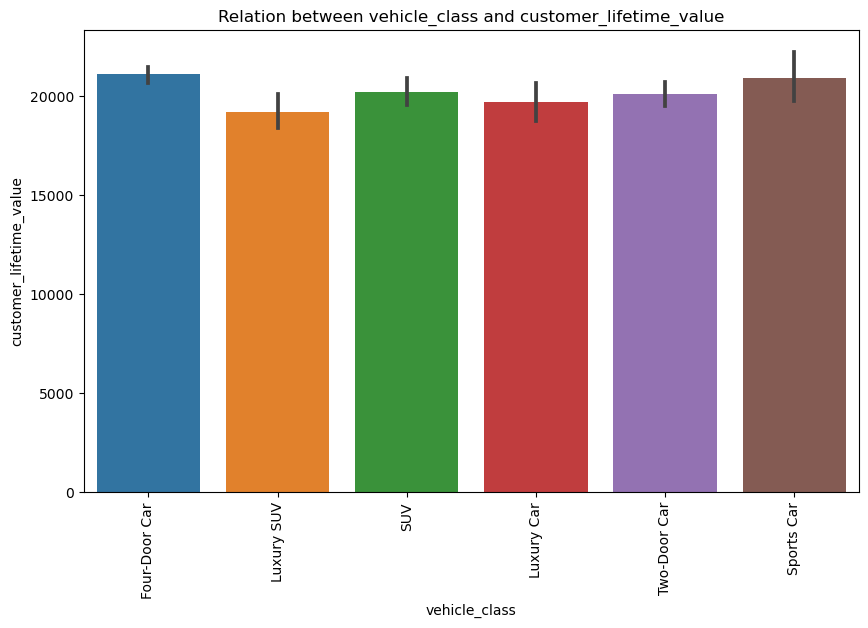

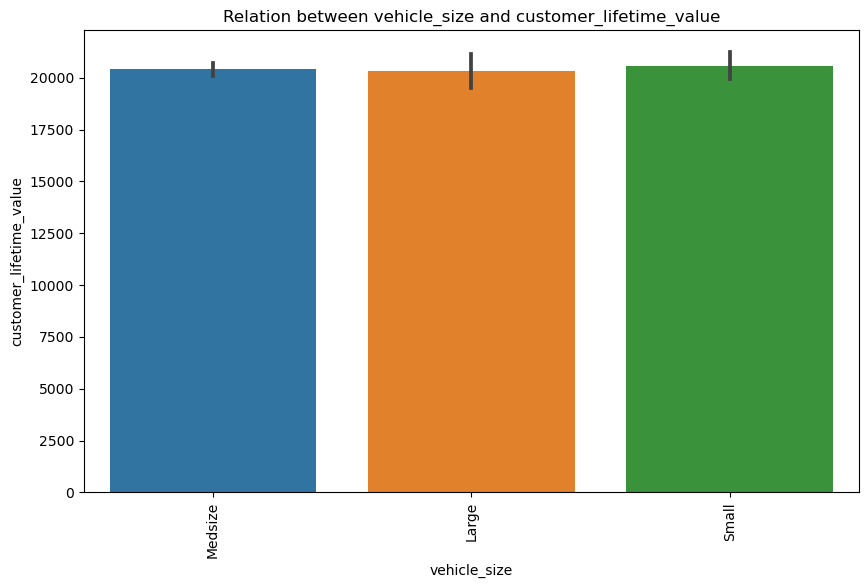

In [41]:
#Plot all the categorical variables with the proper plot. What can you see?

import seaborn as sns
import matplotlib.pyplot as plt

for column in categoricals.columns:
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=column, y="customer_lifetime_value", data=customer_df2)
    plt.title(f"Relation between {column} and customer_lifetime_value")
    plt.xlabel(column)
    plt.ylabel("customer_lifetime_value")
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
#We could remove policy or policy type, and vehicle_class or vehicule_size

#Plot time variable. Can you extract something from it?
#I already extracted before the time variable in month so I cannot plot them right now.